In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
hotel=pd.read_csv('train.csv')

In [3]:
hotel.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
hotel.shape

(38932, 5)

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


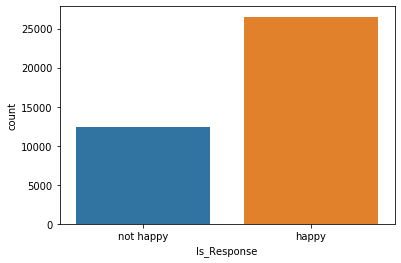

In [6]:
sns.countplot(hotel['Is_Response'])

In [7]:
hotel.drop(columns = ['User_ID','Browser_Used','Device_Used'],inplace =True)

In [8]:
hotel.head(10)

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
5,We had - rooms. One was very nice and clearly ...,happy
6,My husband and I have stayed in this hotel a f...,not happy
7,My wife & I stayed in this glorious city a whi...,happy
8,My boyfriend and I stayed at the Fairmont on a...,happy
9,"Wonderful staff, great location, but it was de...",not happy


In [9]:
def clean_data(text):
    text= text.lower()
    text= re.sub('\[.*?\]','',text)
    text= re.sub('[%s]'% re.escape(string.punctuation),'' ,text)
    text= re.sub('\w*\d\w*','',text)
    text= re.sub('[''""_]','',text)
    text= re.sub('\n','',text)
    return text
data=lambda x: clean_data(x)

In [10]:
hotel['clean_data']=pd.DataFrame(hotel.Description.apply(data))
hotel.head()

,Description,Is_Response,clean_data
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [11]:
X=hotel.clean_data
y=hotel.Is_Response

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [13]:
vec= TfidfVectorizer()
clf =LogisticRegression(solver ="lbfgs")


In [14]:
model =Pipeline([('vectorizer',vec),('classifier',clf)])
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [15]:
prediction=model.predict(X_test)
confusion_matrix(prediction,y_test)

array([[8193,  978],
       [ 523, 3154]], dtype=int64)

In [16]:
print("Accuracy :", accuracy_score(prediction,y_test))
print("Precision :", precision_score(prediction,y_test, average ='weighted'))
print("Recall :", recall_score(prediction, y_test,average= 'weighted'))

Accuracy : 0.8831724782067247
Precision : 0.8894296017067554
Recall : 0.8831724782067247


# Testing model

In [17]:
df=pd.read_csv('test.csv')

In [18]:
df.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [19]:
df.drop(columns = ['User_ID','Browser_Used','Device_Used'],inplace =True)

In [20]:
df.head(10)

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...
5,"Rooms, concierge services and party scene were..."
6,What a pleasant place to stay!\nThe hotel is b...
7,I booked out the same day I arrived. It cost m...
8,Unlike some hotels that grimace when you show ...
9,Hotel Sorella for my birthday. I absolutely lo...


In [21]:
df.shape

(29404, 1)

In [22]:
test=df['Description']
result=model.predict(test)

In [23]:
output=pd.DataFrame(result)
output.head(20)

,0
0,not happy
1,happy
2,not happy
3,not happy
4,happy
5,happy
6,happy
7,not happy
8,happy
9,happy


In [24]:
from sklearn.externals import joblib
joblib.dump(model,'hotel.pkl')

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['hotel.pkl']